In [2]:
#Loading the libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from random import randint
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Data Loading
toronto_data=pd.read_csv("Toronto_2014to2019.csv")

In [4]:
#Data Processing
col_list = ['X','Y','Long','Lat','occurrenceyear','occurrencemonth','occurrenceday','occurrencedayofyear',\
            'occurrencedayofweek','occurrencehour','MCI','Division','Hood_ID','premisetype']
toronto_data=toronto_data[col_list]
toronto_data=toronto_data.dropna(subset=['occurrenceyear'])
crime_var=pd.factorize(toronto_data["MCI"])
toronto_data['MCI'] = crime_var[0]
definition_list_MCI = crime_var[1]
toronto_data['premisetype'] = pd.factorize(toronto_data['premisetype'])[0]
toronto_data['occurrencedayofweek'] = pd.factorize(toronto_data['occurrencedayofweek'])[0]
toronto_data['Division'] = pd.factorize(toronto_data['Division'])[0]
toronto_data['occurrencemonth'] = pd.factorize(toronto_data['occurrencemonth'])[0]

In [5]:
#Splitting Data
X=toronto_data.drop(['MCI'],axis=1).values
y=toronto_data['MCI'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [11]:
#Results function
def result(classifier_random):
    y_pred = classifier_random.best_estimator_.predict(X_test)
    
    print("Accuracy    : ", str(accuracy_score(y_test,y_pred)*100))
    print("Recall      : ", str(recall_score(y_test,y_pred,average='weighted')*100))
    print("Precision   : ", str(precision_score(y_test,y_pred,average='weighted')*100))
    print("F1 Score    : ", str(f1_score(y_test,y_pred,average='micro')*100))
    cf_mat(y_test,y_pred)

In [18]:
#Plotting function
def cf_mat(y_test,y_pred):    
    plt.figure(figsize=(5,5))
    cf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(cf_matrix, annot=True, cmap='rocket_r', xticklabels=definition_list_MCI, yticklabels=definition_list_MCI, \
                fmt='d')
    plt.xticks([0.5,1.5,2.5,3.5,4.5])
    plt.yticks([0.5,1.5,2.5,3.5,4.5])
    plt.xlim(0,5)
    plt.ylim(0,5)
    plt.title('Confusion Matrix')

In [8]:
#RandomForest
rf_classifier = RandomForestClassifier()

#Hyper parameters
params_rf={
    'min_samples_leaf': [int(x) for x in np.linspace(start = 1, stop = 3, num = 3)],
    'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)],
    'max_features': [int(x) for x in np.linspace(start = 1, stop = 8, num = 8)],
    'bootstrap': [True, False],
    'criterion': ['gini','entropy'],
}

rf_random = RandomizedSearchCV(estimator = rf_classifier, param_distributions = params_rf, n_iter = 50, cv = 3, 
                               verbose=2, random_state=0, n_jobs = -1)
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 108.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

========== Random Forest Results ==========

Accuracy    :  67.69551313111735
Recall      :  67.69551313111735
Precision   :  66.48200337454753
F1 Score    :  67.69551313111735


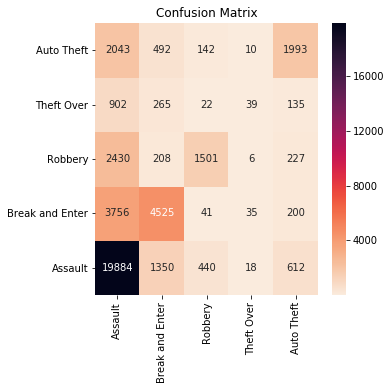

In [22]:
#Results
print("========== Random Forest Results ==========\n")
result(rf_random)

In [27]:
#printing best parameters
print(rf_random.best_params_)

{'n_estimators': 282, 'min_samples_leaf': 2, 'max_features': 2, 'criterion': 'entropy', 'bootstrap': False}


In [28]:
#knn
knn_classifier=KNeighborsClassifier()

#Hyperparameters
params_knn={
    'n_neighbors': [int(x) for x in np.linspace(start = 1, stop = 10, num = 10)],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

knn_random = RandomizedSearchCV(estimator = knn_classifier, param_distributions = params_knn, n_iter = 50, cv = 3, 
                               verbose=2, random_state=0, n_jobs = -1)
knn_random.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 49.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=50, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10],
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=0, refit=True,
                   re

========== KNN Results ==========

Accuracy    :  59.59637561779242
Recall      :  59.59637561779242
Precision   :  56.3161015034182
F1 Score    :  59.59637561779242


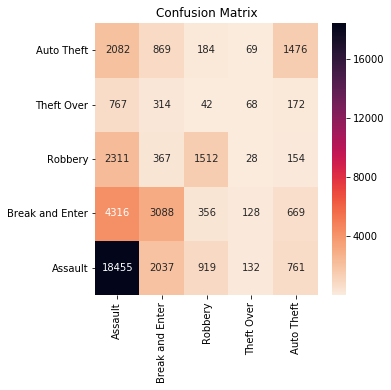

In [29]:
#Results
print("========== KNN Results ==========\n")
result(knn_random)

In [30]:
#printing best parameters
print(knn_random.best_params_)

{'weights': 'distance', 'n_neighbors': 10, 'algorithm': 'brute'}


In [23]:
#AdaBoost
ab_classifier = AdaBoostClassifier()

#Hyperparameters
params_ab={
    'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)],
    'learning_rate': scipy.stats.reciprocal(0.01, 1.0),
    'algorithm': ['SAMME.R', 'SAMME'],
    'random_state': [int(x) for x in np.linspace(start = 1, stop = 10, num = 10)]
}

ab_random = RandomizedSearchCV(estimator = ab_classifier, param_distributions = params_ab, n_iter = 50, cv = 3, 
                               verbose=2, random_state=0, n_jobs = -1)
ab_random.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 26.3min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=None),
                   iid='warn', n_iter=50, n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME.R', 'SAMME'],
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000289CB031108>,
                                        'n_estimators': [10, 64, 118, 173, 227,
                                                         282, 336, 391, 445,
                                                         500],
                                        'random_state': [1, 2, 3, 4, 5, 6, 7, 8,
                                          

========== Ada Boost Results ==========

Accuracy    :  57.76480279096812
Recall      :  57.76480279096812
Precision   :  51.55653460592251
F1 Score    :  57.76480279096812


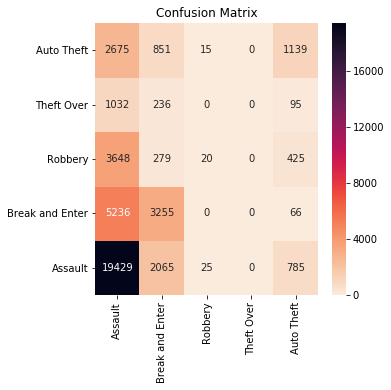

In [24]:
#Results
print("========== Ada Boost Results ==========\n")
result(ab_random)

In [26]:
#printing best parameters
print(ab_random.best_params_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.45486242087219375, 'n_estimators': 445, 'random_state': 3}
